In [53]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math
from tabulate import tabulate

In [54]:
dir = "p_date=2023-01-12-12_04_53"

In [55]:
path = f'../../output/weights/{dir}/evaluate/metrics.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

games = data["games"]

print(f"Games: {games}")

Games: 1000


In [56]:
def plot_stats(data, games):

    actions_top = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", ]
    actions_bottom = ["FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFE", "FINISH_CHANCE"]

    game_id = 0

    points_top_list = []
    points_bottom_list = []

    points_top = 0
    points_bottom = 0

    zero_top = 0
    zero_bottom = 0

    for a in data["actions"]:
        if game_id != a["game_id"]:
            points_top_list.append(points_top)
            points_bottom_list.append(points_bottom)

            if points_top == 0:
                zero_top += 1
            if points_bottom == 0:
                zero_bottom += 1

            points_top = 0
            points_bottom = 0

            game_id = a["game_id"]
        else:
            if a["action"] in actions_top:
                points_top += a["points"]
            elif a["action"] in actions_bottom:
                points_bottom += a["points"]

    table = []
    table.append(["Top - max", max(points_top_list)])
    table.append([f"Top - min ({zero_top})", min(points_top_list)])
    table.append(["Top - mean", stat.mean(points_top_list)])
    table.append(["Top - bonus", len([x for x in points_top_list if x >= 63])])
    
    table.append(["Bottom - max", max(points_bottom_list)])
    table.append([f"Bottom - min ({zero_bottom})", min(points_bottom_list)])
    table.append(["Bottom - mean", stat.mean(points_bottom_list)])
    
    print (tabulate(table, headers=["Metric", "Value"]))
    

In [57]:
plot_stats(data, games)

Metric              Value
----------------  -------
Top - max          62
Top - min (1)       0
Top - mean         35.537
Top - bonus         0
Bottom - max      165
Bottom - min (1)    0
Bottom - mean      99.719


In [58]:
def plot_bottom_action(data, games):
    counter = 0
    points = []

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", "FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFE", "FINISH_CHANCE"]

    actions_dict = {}

    for a in data["actions"]:
        action = a["action"]

        if action not in actions_dict:
            actions_dict[action] = {}
            actions_dict[action]["counter"] = 0
            actions_dict[action]["points"] = []
        else:
            actions_dict[action]["counter"] += 1
            actions_dict[action]["points"].append(a["points"])
    
    for action in actions:
        if action in actions_dict:
            counter = actions_dict[action]["counter"]
            points = actions_dict[action]["points"]

            if action in ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES"]:
                plt.hist(points, bins=5, edgecolor='black', linewidth=1.2,)
            else:
                plt.hist(points, bins=30, edgecolor='black', linewidth=1.2,)

            plt.title(f"{action} - {counter / games * 100}%")
            plt.show()

            print(f"Used ({action}): {counter} - {counter / games * 100}%")
            print(f"Not Used ({action}): {games - counter} - {(games - counter) / (games) * 100}%")
            print("------------------")

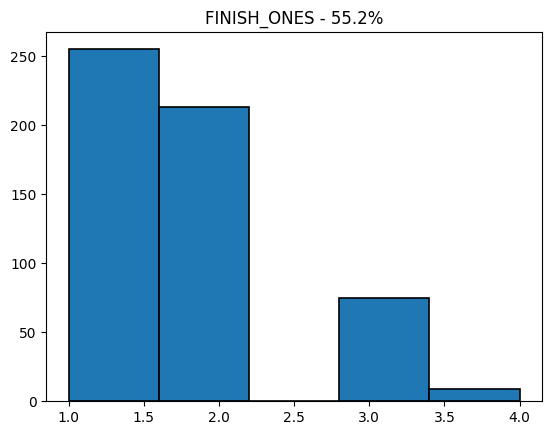

Used (FINISH_ONES): 552 - 55.2%
Not Used (FINISH_ONES): 448 - 44.800000000000004%
------------------


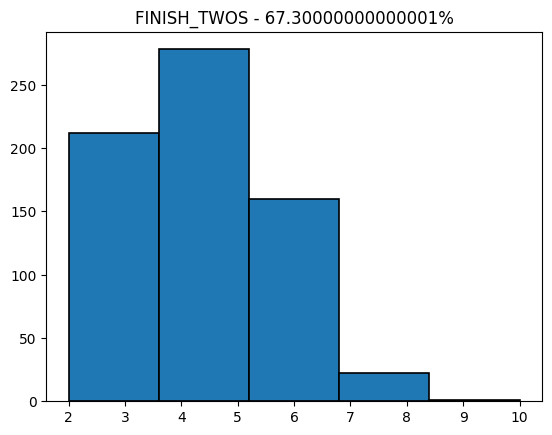

Used (FINISH_TWOS): 673 - 67.30000000000001%
Not Used (FINISH_TWOS): 327 - 32.7%
------------------


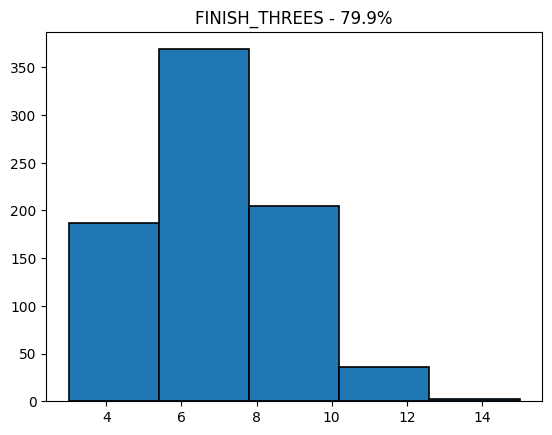

Used (FINISH_THREES): 799 - 79.9%
Not Used (FINISH_THREES): 201 - 20.1%
------------------


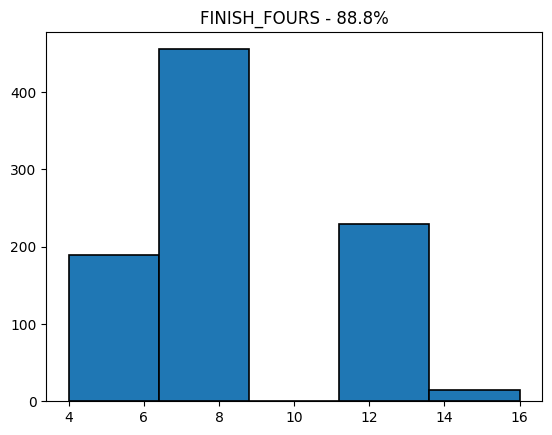

Used (FINISH_FOURS): 888 - 88.8%
Not Used (FINISH_FOURS): 112 - 11.200000000000001%
------------------


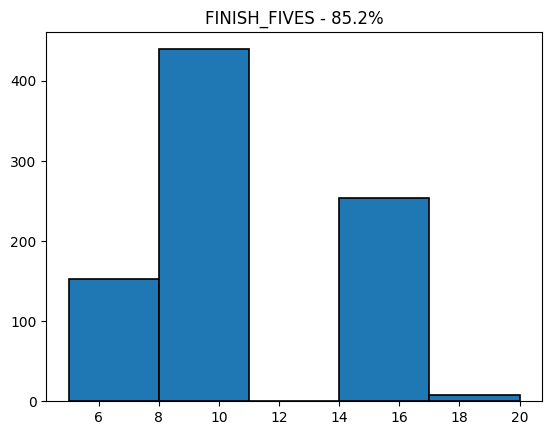

Used (FINISH_FIVES): 852 - 85.2%
Not Used (FINISH_FIVES): 148 - 14.799999999999999%
------------------


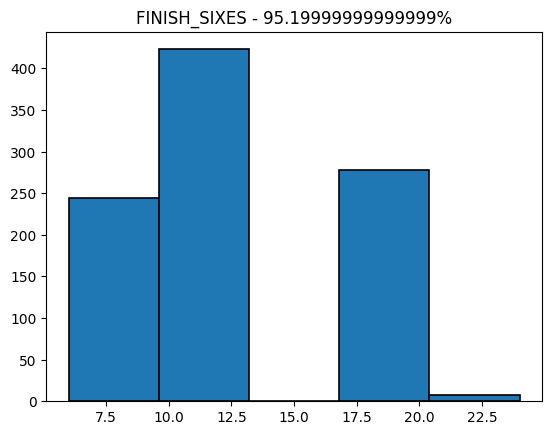

Used (FINISH_SIXES): 952 - 95.19999999999999%
Not Used (FINISH_SIXES): 48 - 4.8%
------------------


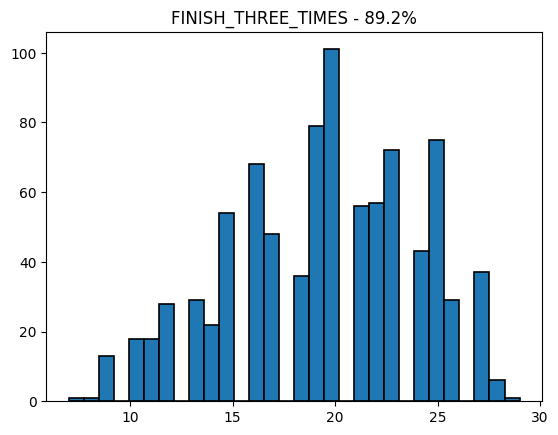

Used (FINISH_THREE_TIMES): 892 - 89.2%
Not Used (FINISH_THREE_TIMES): 108 - 10.8%
------------------


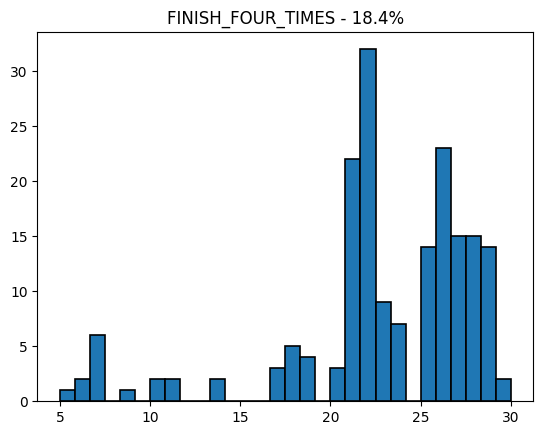

Used (FINISH_FOUR_TIMES): 184 - 18.4%
Not Used (FINISH_FOUR_TIMES): 816 - 81.6%
------------------


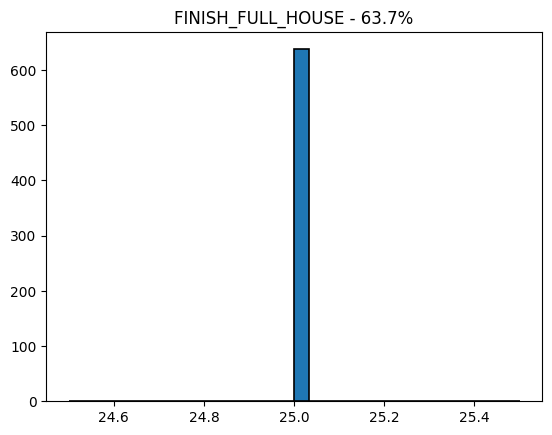

Used (FINISH_FULL_HOUSE): 637 - 63.7%
Not Used (FINISH_FULL_HOUSE): 363 - 36.3%
------------------


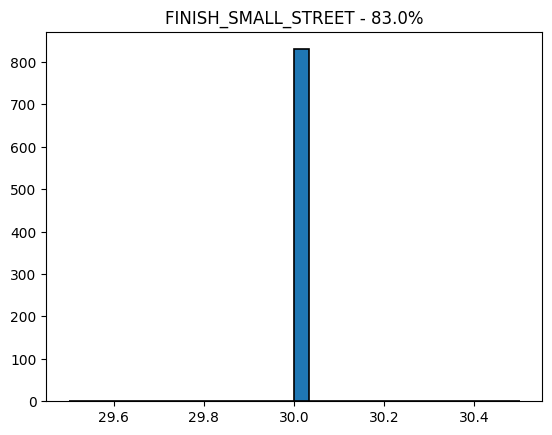

Used (FINISH_SMALL_STREET): 830 - 83.0%
Not Used (FINISH_SMALL_STREET): 170 - 17.0%
------------------


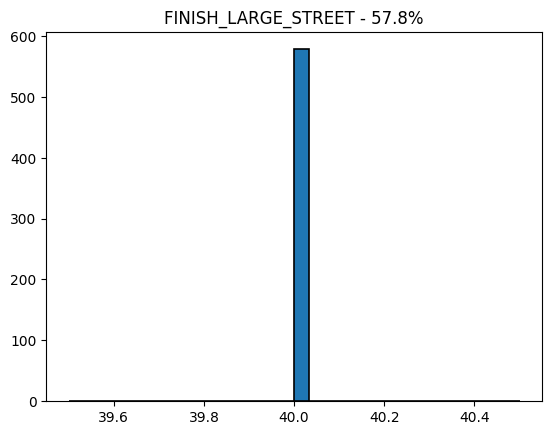

Used (FINISH_LARGE_STREET): 578 - 57.8%
Not Used (FINISH_LARGE_STREET): 422 - 42.199999999999996%
------------------


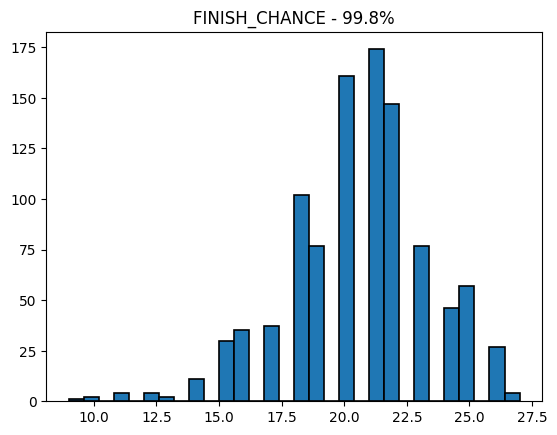

Used (FINISH_CHANCE): 998 - 99.8%
Not Used (FINISH_CHANCE): 2 - 0.2%
------------------


In [59]:
plot_bottom_action(data, games)

In [60]:
def plot_top_action(data, action, games):
    counter = 0
    dices = []

    scaler = 1

    for a in data["actions"]:
        if a["action"] == action:
            counter += 1

            if action == "FINISH_ONES":
                dices.append(int(a["points"] / 1))
                scaler = 1
            if action == "FINISH_TWOS":
                dices.append(int(a["points"] / 2))
                scaler = 2
            if action == "FINISH_THREES":
                dices.append(int(a["points"] / 3))
                scaler = 3
            if action == "FINISH_FOURS":
                dices.append(int(a["points"] / 4))
                scaler = 4
            if action == "FINISH_FIVES":
                dices.append(int(a["points"] / 5))
                scaler = 5
            if action == "FINISH_SIXES":
                dices.append(int(a["points"] / 6))
                scaler = 6
    
    dices += [0] * (games - counter)
    # print(dices)
    plt.hist(dices, bins=5)
    plt.title(action)
    plt.show()

    print(f"Min: {min(dices)}")
    print(f"Max: {max(dices)} (points: {max(dices) * scaler})")

In [61]:
from tabulate import tabulate

def plot_bottom_action_binary(data, games):

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", "FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFFEL", "FINISH_CHANCE"]
    
    table = []

    for action in actions:

        counter = 0

        for a in data["actions"]:
            if a["action"] == action:
                counter += 1
                
        table.append([action, counter, games - counter, str(round(counter / games * 100)) + "%"])
    
    print (tabulate(table, headers=["Action", "Used", "Not used", "%"]))
    

In [62]:


def plot_top(data, games):

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES"]
    
    table = []

    for action in actions:

        counter = 0

        dice_1 = 0
        dice_2 = 0
        dice_3 = 0
        dice_4 = 0
        dice_5 = 0

        for a in data["actions"]:
            if a["action"] == action:
                counter += 1

                dices = 0
                if action == "FINISH_ONES":
                    dices = int(a["points"] / 1)
                if action == "FINISH_TWOS":
                    dices = int(a["points"] / 2)
                if action == "FINISH_THREES":
                    dices = int(a["points"] / 3)
                if action == "FINISH_FOURS":
                    dices = int(a["points"] / 4)
                if action == "FINISH_FIVES":
                    dices = int(a["points"] / 5)
                if action == "FINISH_SIXES":
                    dices = int(a["points"] / 6)
                
                if (dices == 1):
                    dice_1 += 1
                if (dices == 2):
                    dice_2 += 1
                if (dices == 3):
                    dice_3 += 1
                if (dices == 4):
                    dice_4 += 1
                if (dices == 5):
                    dice_5 += 1

        str_dice_1 = str(dice_1) + " - " + str(round((dice_1 / games) * 100)) + "%"
        str_dice_2 = str(dice_2) + " - " + str(round((dice_2 / games) * 100)) + "%"
        str_dice_3 = str(dice_3) + " - " + str(round((dice_3 / games) * 100)) + "%"
        str_dice_4 = str(dice_4) + " - " + str(round((dice_4 / games) * 100)) + "%"
        str_dice_5 = str(dice_5) + " - " + str(round((dice_5 / games) * 100)) + "%"

        str_dice_0 = str((games - counter)) + " - " + str(round(((games - counter) / games) * 100)) + "%"

        table.append([action, str_dice_0, str_dice_1, str_dice_2, str_dice_3, str_dice_4, str_dice_5])
    
    print (tabulate(table, headers=["Action", "Dice 0", "Dice 1", "Dice 2", "Dice 3", "Dice 4", "Dice 5"]))
    

In [63]:
plot_top(data, games)

Action         Dice 0     Dice 1     Dice 2     Dice 3     Dice 4    Dice 5
-------------  ---------  ---------  ---------  ---------  --------  --------
FINISH_ONES    447 - 45%  256 - 26%  213 - 21%  75 - 8%    9 - 1%    0 - 0%
FINISH_TWOS    326 - 33%  212 - 21%  278 - 28%  161 - 16%  22 - 2%   1 - 0%
FINISH_THREES  200 - 20%  187 - 19%  369 - 37%  206 - 21%  36 - 4%   2 - 0%
FINISH_FOURS   111 - 11%  189 - 19%  456 - 46%  229 - 23%  15 - 2%   0 - 0%
FINISH_FIVES   147 - 15%  152 - 15%  440 - 44%  253 - 25%  8 - 1%    0 - 0%
FINISH_SIXES   47 - 5%    244 - 24%  424 - 42%  278 - 28%  7 - 1%    0 - 0%


In [64]:
plot_bottom_action_binary(data, games)

Action                 Used    Not used  %
-------------------  ------  ----------  ----
FINISH_ONES             553         447  55%
FINISH_TWOS             674         326  67%
FINISH_THREES           800         200  80%
FINISH_FOURS            889         111  89%
FINISH_FIVES            853         147  85%
FINISH_SIXES            953          47  95%
FINISH_THREE_TIMES      893         107  89%
FINISH_FOUR_TIMES       185         815  18%
FINISH_FULL_HOUSE       638         362  64%
FINISH_SMALL_STREET     831         169  83%
FINISH_LARGE_STREET     579         421  58%
FINISH_KNIFFEL            0        1000  0%
FINISH_CHANCE           999           1  100%


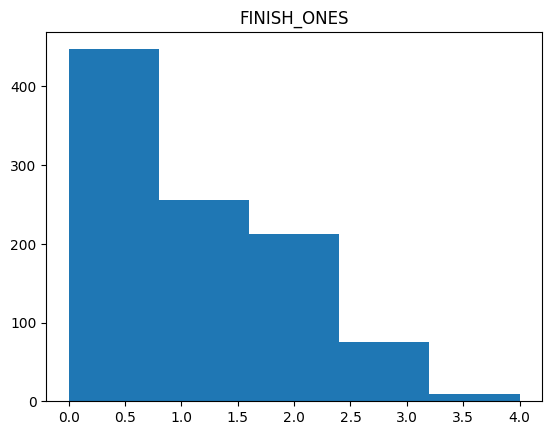

Min: 0
Max: 4 (points: 4)


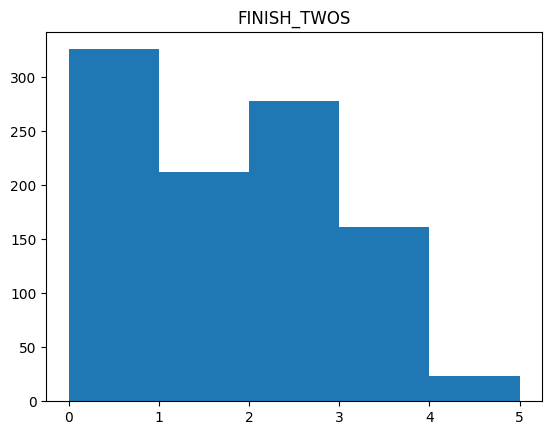

Min: 0
Max: 5 (points: 10)


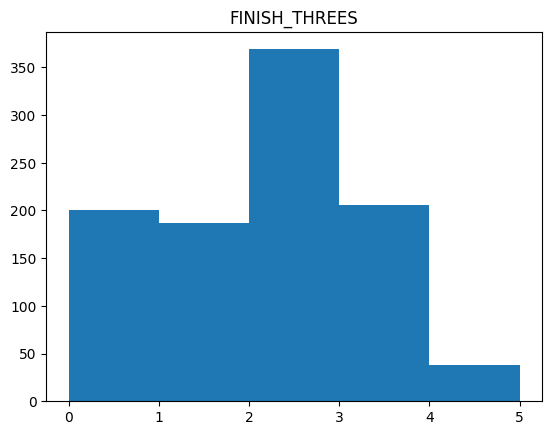

Min: 0
Max: 5 (points: 15)


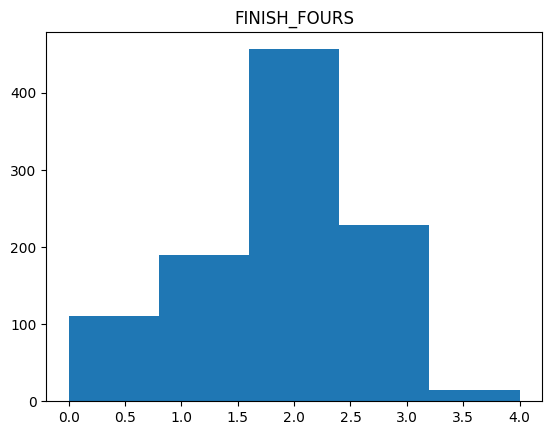

Min: 0
Max: 4 (points: 16)


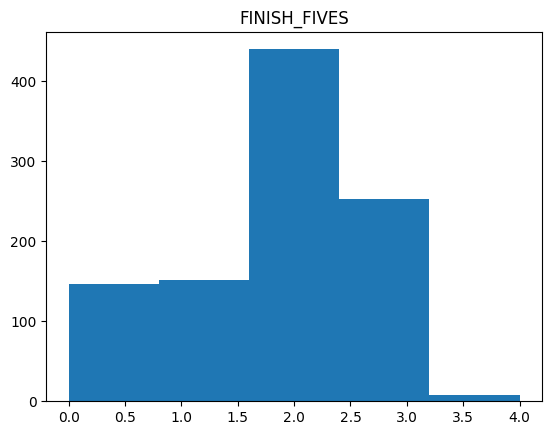

Min: 0
Max: 4 (points: 20)


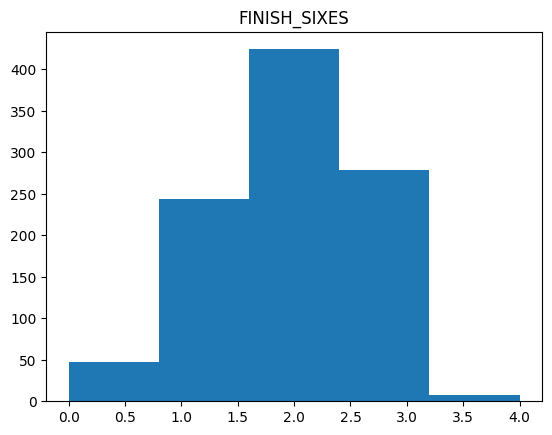

Min: 0
Max: 4 (points: 24)


In [65]:
plot_top_action(data, "FINISH_ONES", games)
plot_top_action(data, "FINISH_TWOS", games)
plot_top_action(data, "FINISH_THREES", games)
plot_top_action(data, "FINISH_FOURS", games)
plot_top_action(data, "FINISH_FIVES", games)
plot_top_action(data, "FINISH_SIXES", games)